In [ ]:
!pip install seaborn

In [ ]:
!pip install openpyxl

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy                 as np
import geopandas             as gpd
import seaborn               as sns
import folium  #needed for interactive map
from folium.plugins import HeatMap
%matplotlib inline
sns.set()

D:\JUAN CAMILO\Anaconda\envs\geo_env\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(


# Carga geojson

In [2]:
file_path= 'D:/JUAN CAMILO/DS4A/Proyecto FInal/locashp/Loca.shp'
file_path2='D:/JUAN CAMILO/DS4A/Proyecto FInal/Bases de Datos/Bases_limpias/HealthFacilities.csv'

In [3]:
MapaLocalidades = gpd.read_file(file_path)
MapaLocalidades

,LocNombre,LocAAdmini,LocArea,LocCodigo,SHAPE_Leng,SHAPE_Area,geometry
0,ANTONIO NARIÑO,Acuerdo 117 de 2003,4.879543e+06,15,0.108973,0.000397,"POLYGON ((-74.13075 4.59335, -74.12917 4.59327..."
1,TUNJUELITO,Acuerdo 117 de 2003,9.910940e+06,06,0.210542,0.000807,"POLYGON ((-74.13777 4.59489, -74.13165 4.59363..."
2,RAFAEL URIBE URIBE,Acuerdo 117 de 2003,1.383408e+07,18,0.174513,0.001126,"POLYGON ((-74.12803 4.59254, -74.12777 4.59233..."
3,CANDELARIA,Acuerdo 117 de 2003,2.060243e+06,17,0.067158,0.000168,"POLYGON ((-74.06621 4.60317, -74.06620 4.60317..."
4,BARRIOS UNIDOS,Acuerdo 8 de 1977,1.190345e+07,12,0.121180,0.000969,"POLYGON ((-74.05725 4.68684, -74.06249 4.65594..."
5,TEUSAQUILLO,Acuerdo 8 de 1977,1.419317e+07,13,0.148314,0.001156,"POLYGON ((-74.09372 4.66607, -74.09332 4.66574..."
6,PUENTE ARANDA,Acuerdo 8 de 1977,1.731115e+07,16,0.161116,0.001410,"POLYGON ((-74.11830 4.63741, -74.11504 4.64053..."
7,LOS MARTIRES,Acuerdo 8 de 1977,6.514046e+06,14,0.099382,0.000530,"POLYGON ((-74.07283 4.61542, -74.07311 4.61480..."
8,SUMAPAZ,Acuerdo 9 de 1986,7.809688e+08,20,1.914949,0.063549,"POLYGON ((-74.20584 4.26966, -74.20584 4.26966..."
9,USAQUEN,Acuerdo 8 de 1977 y Res 1751 de 2016,6.520141e+07,01,0.436907,0.005310,"POLYGON ((-74.01116 4.66459, -74.01117 4.66460..."


In [4]:
dic_Localidades={'TEUSAQUILLO':'Teusaquillo',
                'USAQUEN':'Usaquén',
                'CHAPINERO':'Chapinero',
                'SANTA FE':'Santa Fe',
                'SAN CRISTOBAL':'San Cristobal',
                'USME':'Usme',
                'TUNJUELITO':'Tunjuelito',
                'BOSA':'Bosa',
                'KENNEDY':'Kennedy',
                'FONTIBON':'Fontibón',
                'ENGATIVA':'Engativá',
                'SUBA':'Suba',
                'BARRIOS UNIDOS':'Barrios Unidos',
                'TEUSAQUILLO':'Teusaquillo',
                'LOS MARTIRES':'Los Mártires',
                'ANTONIO NARIÑO':'Antonio Nariño',
                'PUENTE ARANDA':'Puente Aranda',
                'CANDELARIA':'La Candelaria',
                'RAFAEL URIBE URIBE':'Rafael Uribe Uribe',
                'CIUDAD BOLIVAR':'Ciudad Bolivar',
                 'SUMAPAZ':'Sumapaz'
}

In [5]:
MapaLocalidades['Nombre_Localidad']=MapaLocalidades['LocNombre'].replace(dic_Localidades)
MapaLocalidades['geometry2']=MapaLocalidades['geometry']
MapaLocalidades

,LocNombre,LocAAdmini,LocArea,LocCodigo,SHAPE_Leng,SHAPE_Area,geometry,Nombre_Localidad,geometry2
0,ANTONIO NARIÑO,Acuerdo 117 de 2003,4.879543e+06,15,0.108973,0.000397,"POLYGON ((-74.13075 4.59335, -74.12917 4.59327...",Antonio Nariño,"POLYGON ((-74.13075 4.59335, -74.12917 4.59327..."
1,TUNJUELITO,Acuerdo 117 de 2003,9.910940e+06,06,0.210542,0.000807,"POLYGON ((-74.13777 4.59489, -74.13165 4.59363...",Tunjuelito,"POLYGON ((-74.13777 4.59489, -74.13165 4.59363..."
2,RAFAEL URIBE URIBE,Acuerdo 117 de 2003,1.383408e+07,18,0.174513,0.001126,"POLYGON ((-74.12803 4.59254, -74.12777 4.59233...",Rafael Uribe Uribe,"POLYGON ((-74.12803 4.59254, -74.12777 4.59233..."
3,CANDELARIA,Acuerdo 117 de 2003,2.060243e+06,17,0.067158,0.000168,"POLYGON ((-74.06621 4.60317, -74.06620 4.60317...",La Candelaria,"POLYGON ((-74.06621 4.60317, -74.06620 4.60317..."
4,BARRIOS UNIDOS,Acuerdo 8 de 1977,1.190345e+07,12,0.121180,0.000969,"POLYGON ((-74.05725 4.68684, -74.06249 4.65594...",Barrios Unidos,"POLYGON ((-74.05725 4.68684, -74.06249 4.65594..."
5,TEUSAQUILLO,Acuerdo 8 de 1977,1.419317e+07,13,0.148314,0.001156,"POLYGON ((-74.09372 4.66607, -74.09332 4.66574...",Teusaquillo,"POLYGON ((-74.09372 4.66607, -74.09332 4.66574..."
6,PUENTE ARANDA,Acuerdo 8 de 1977,1.731115e+07,16,0.161116,0.001410,"POLYGON ((-74.11830 4.63741, -74.11504 4.64053...",Puente Aranda,"POLYGON ((-74.11830 4.63741, -74.11504 4.64053..."
7,LOS MARTIRES,Acuerdo 8 de 1977,6.514046e+06,14,0.099382,0.000530,"POLYGON ((-74.07283 4.61542, -74.07311 4.61480...",Los Mártires,"POLYGON ((-74.07283 4.61542, -74.07311 4.61480..."
8,SUMAPAZ,Acuerdo 9 de 1986,7.809688e+08,20,1.914949,0.063549,"POLYGON ((-74.20584 4.26966, -74.20584 4.26966...",Sumapaz,"POLYGON ((-74.20584 4.26966, -74.20584 4.26966..."
9,USAQUEN,Acuerdo 8 de 1977 y Res 1751 de 2016,6.520141e+07,01,0.436907,0.005310,"POLYGON ((-74.01116 4.66459, -74.01117 4.66460...",Usaquén,"POLYGON ((-74.01116 4.66459, -74.01117 4.66460..."


<AxesSubplot:>

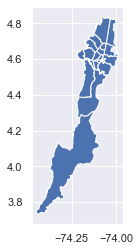

In [6]:
MapaLocalidades.plot()

# Carga base TM

In [7]:
df_health = pd.read_csv(file_path2)
df_health

,id,iddepto,nomdepto,idmpio,nompio,codigohabilitacion,nombre,nitsnit,ese,direccion,direccionorig,telefono,najunombre,numerosedeprincipal,latitude,longitude
0,1,11,Bogotá D.C,11001,BOGOTÁ,"1,100,100,032",COOPERATIVA PARA LA SALUD ORAL ORALCOOP,"830,000,001",NO,CARRERA 64 100-55,CARRERA 64 100-55,5330539-3134241468,Privada,1,4.597791,-74.155205
1,2,11,Bogotá D.C,11001,BOGOTÁ,"1,100,100,103",INSTITUTO NACIONAL DEL RIÑON LTDA,"800,241,339",NO,CLL 43 # 25 - 61,CLL 43 # 25 - 61,4391270,Privada,1,4.653648,-74.100780
2,3,11,Bogotá D.C,11001,BOGOTÁ,"1,100,100,130",INVERSIONES DAMA SALUD SAS,"830,108,482",NO,CARRERA 15 No. 95-18/22 LC 1 - Barrio:CHICO NORTE,CARRERA 15 No. 95-18/22 LC 1 - Barrio:CHICO NORTE,3144311,Privada,23,4.705564,-74.042683
3,4,11,Bogotá D.C,11001,BOGOTÁ,"1,100,100,203",FUNDACION CEPYTIN,"830,111,502",NO,CRA 73 No 7 C - 39,CRA 73 No 7 C - 39,2921430,Privada,1,4.639183,-74.138618
4,6,11,Bogotá D.C,11001,BOGOTÁ,"1,100,100,224",ETICA ORAL LIMITADA,"800,176,600",NO,CL 127 No 19A -44/62 P2 CONS 202-203 ACOMEDICA 2,CL 127 No 19A -44/62 P2 CONS 202-203 ACOMEDICA 2,6025050,Privada,1,4.625436,-74.129130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602,1456,11,Bogotá D.C,11001,BOGOTÁ,"1,100,135,763",Centro de Atencion Manejo Integral de Heridas ...,"901,306,963",NaN,CALLE 14 A No. 19-50 SUR,CALLE 14 A No. 19-50 SUR,7038688- 3504459463,Privada,1,4.588061,-74.100087
1603,1564,11,Bogotá D.C,11001,BOGOTÁ,"1,100,137,641",SERVÍ + IPS SAS,"901,485,250",NaN,AC 26 # 85 D - 55 LC LE36,AC 26 # 85 D - 55 LC LE36,3102821741,Privada,1,4.676300,-74.119775
1604,1569,11,Bogotá D.C,11001,BOGOTÁ,"1,100,137,658",DERMA EXPRESS SAS,"900,793,687",NaN,Ac 26 #68 C-61 Of 805 Edificio Torre Central -...,Ac 26 #68 C-61 Of 805 Edificio Torre Central -...,3165295870,Privada,2,4.656484,-74.106160
1605,1098,11,Bogotá D.C,11001,BOGOTÁ,"1,100,126,740",GRUPO 20 20 SAS CUYA SIGLA ES GRUPO 20 20,"900,379,632",NaN,CL 19 9 01 P 5,CL 19 9 01 P 5,2826865,Privada,1,4.606270,-74.073240


In [8]:
df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1607 entries, 0 to 1606
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1607 non-null   int64  
 1   iddepto              1607 non-null   int64  
 2   nomdepto             1607 non-null   object 
 3   idmpio               1607 non-null   int64  
 4   nompio               1607 non-null   object 
 5   codigohabilitacion   1607 non-null   object 
 6   nombre               1607 non-null   object 
 7   nitsnit              1607 non-null   object 
 8   ese                  626 non-null    object 
 9   direccion            1607 non-null   object 
 10  direccionorig        1607 non-null   object 
 11  telefono             1607 non-null   object 
 12  najunombre           1607 non-null   object 
 13  numerosedeprincipal  1607 non-null   int64  
 14  latitude             1607 non-null   float64
 15  longitude            1607 non-null   f

In [9]:
gdf = gpd.GeoDataFrame(df_health, geometry=gpd.points_from_xy(df_health.longitude, df_health.latitude))
gdf

,id,iddepto,nomdepto,idmpio,nompio,codigohabilitacion,nombre,nitsnit,ese,direccion,direccionorig,telefono,najunombre,numerosedeprincipal,latitude,longitude,geometry
0,1,11,Bogotá D.C,11001,BOGOTÁ,"1,100,100,032",COOPERATIVA PARA LA SALUD ORAL ORALCOOP,"830,000,001",NO,CARRERA 64 100-55,CARRERA 64 100-55,5330539-3134241468,Privada,1,4.597791,-74.155205,POINT (-74.15521 4.59779)
1,2,11,Bogotá D.C,11001,BOGOTÁ,"1,100,100,103",INSTITUTO NACIONAL DEL RIÑON LTDA,"800,241,339",NO,CLL 43 # 25 - 61,CLL 43 # 25 - 61,4391270,Privada,1,4.653648,-74.100780,POINT (-74.10078 4.65365)
2,3,11,Bogotá D.C,11001,BOGOTÁ,"1,100,100,130",INVERSIONES DAMA SALUD SAS,"830,108,482",NO,CARRERA 15 No. 95-18/22 LC 1 - Barrio:CHICO NORTE,CARRERA 15 No. 95-18/22 LC 1 - Barrio:CHICO NORTE,3144311,Privada,23,4.705564,-74.042683,POINT (-74.04268 4.70556)
3,4,11,Bogotá D.C,11001,BOGOTÁ,"1,100,100,203",FUNDACION CEPYTIN,"830,111,502",NO,CRA 73 No 7 C - 39,CRA 73 No 7 C - 39,2921430,Privada,1,4.639183,-74.138618,POINT (-74.13862 4.63918)
4,6,11,Bogotá D.C,11001,BOGOTÁ,"1,100,100,224",ETICA ORAL LIMITADA,"800,176,600",NO,CL 127 No 19A -44/62 P2 CONS 202-203 ACOMEDICA 2,CL 127 No 19A -44/62 P2 CONS 202-203 ACOMEDICA 2,6025050,Privada,1,4.625436,-74.129130,POINT (-74.12913 4.62544)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602,1456,11,Bogotá D.C,11001,BOGOTÁ,"1,100,135,763",Centro de Atencion Manejo Integral de Heridas ...,"901,306,963",NaN,CALLE 14 A No. 19-50 SUR,CALLE 14 A No. 19-50 SUR,7038688- 3504459463,Privada,1,4.588061,-74.100087,POINT (-74.10009 4.58806)
1603,1564,11,Bogotá D.C,11001,BOGOTÁ,"1,100,137,641",SERVÍ + IPS SAS,"901,485,250",NaN,AC 26 # 85 D - 55 LC LE36,AC 26 # 85 D - 55 LC LE36,3102821741,Privada,1,4.676300,-74.119775,POINT (-74.11978 4.67630)
1604,1569,11,Bogotá D.C,11001,BOGOTÁ,"1,100,137,658",DERMA EXPRESS SAS,"900,793,687",NaN,Ac 26 #68 C-61 Of 805 Edificio Torre Central -...,Ac 26 #68 C-61 Of 805 Edificio Torre Central -...,3165295870,Privada,2,4.656484,-74.106160,POINT (-74.10616 4.65648)
1605,1098,11,Bogotá D.C,11001,BOGOTÁ,"1,100,126,740",GRUPO 20 20 SAS CUYA SIGLA ES GRUPO 20 20,"900,379,632",NaN,CL 19 9 01 P 5,CL 19 9 01 P 5,2826865,Privada,1,4.606270,-74.073240,POINT (-74.07324 4.60627)


In [10]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1607 entries, 0 to 1606
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   1607 non-null   int64   
 1   iddepto              1607 non-null   int64   
 2   nomdepto             1607 non-null   object  
 3   idmpio               1607 non-null   int64   
 4   nompio               1607 non-null   object  
 5   codigohabilitacion   1607 non-null   object  
 6   nombre               1607 non-null   object  
 7   nitsnit              1607 non-null   object  
 8   ese                  626 non-null    object  
 9   direccion            1607 non-null   object  
 10  direccionorig        1607 non-null   object  
 11  telefono             1607 non-null   object  
 12  najunombre           1607 non-null   object  
 13  numerosedeprincipal  1607 non-null   int64   
 14  latitude             1607 non-null   float64 
 15  longitude    

In [11]:
base1 = gpd.sjoin(gdf,MapaLocalidades[['geometry','Nombre_Localidad','geometry2']], how='left',op='within')
base1

D:\JUAN CAMILO\Anaconda\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\JUAN CAMILO\AppData\Local\Temp\ipykernel_8832\3833747746.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4686

  base1 = gpd.sjoin(gdf,MapaLocalidades[['geometry','Nombre_Localidad','geometry2']], how='left',op='within')


,id,iddepto,nomdepto,idmpio,nompio,codigohabilitacion,nombre,nitsnit,ese,direccion,direccionorig,telefono,najunombre,numerosedeprincipal,latitude,longitude,geometry,index_right,Nombre_Localidad,geometry2
0,1,11,Bogotá D.C,11001,BOGOTÁ,"1,100,100,032",COOPERATIVA PARA LA SALUD ORAL ORALCOOP,"830,000,001",NO,CARRERA 64 100-55,CARRERA 64 100-55,5330539-3134241468,Privada,1,4.597791,-74.155205,POINT (-74.15521 4.59779),14.0,Ciudad Bolivar,"POLYGON ((-74.21092 4.38691, -74.21114 4.38750..."
1,2,11,Bogotá D.C,11001,BOGOTÁ,"1,100,100,103",INSTITUTO NACIONAL DEL RIÑON LTDA,"800,241,339",NO,CLL 43 # 25 - 61,CLL 43 # 25 - 61,4391270,Privada,1,4.653648,-74.100780,POINT (-74.10078 4.65365),5.0,Teusaquillo,"POLYGON ((-74.09372 4.66607, -74.09332 4.66574..."
2,3,11,Bogotá D.C,11001,BOGOTÁ,"1,100,100,130",INVERSIONES DAMA SALUD SAS,"830,108,482",NO,CARRERA 15 No. 95-18/22 LC 1 - Barrio:CHICO NORTE,CARRERA 15 No. 95-18/22 LC 1 - Barrio:CHICO NORTE,3144311,Privada,23,4.705564,-74.042683,POINT (-74.04268 4.70556),9.0,Usaquén,"POLYGON ((-74.01116 4.66459, -74.01117 4.66460..."
3,4,11,Bogotá D.C,11001,BOGOTÁ,"1,100,100,203",FUNDACION CEPYTIN,"830,111,502",NO,CRA 73 No 7 C - 39,CRA 73 No 7 C - 39,2921430,Privada,1,4.639183,-74.138618,POINT (-74.13862 4.63918),16.0,Kennedy,"POLYGON ((-74.18567 4.64705, -74.18527 4.64699..."
4,6,11,Bogotá D.C,11001,BOGOTÁ,"1,100,100,224",ETICA ORAL LIMITADA,"800,176,600",NO,CL 127 No 19A -44/62 P2 CONS 202-203 ACOMEDICA 2,CL 127 No 19A -44/62 P2 CONS 202-203 ACOMEDICA 2,6025050,Privada,1,4.625436,-74.129130,POINT (-74.12913 4.62544),16.0,Kennedy,"POLYGON ((-74.18567 4.64705, -74.18527 4.64699..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602,1456,11,Bogotá D.C,11001,BOGOTÁ,"1,100,135,763",Centro de Atencion Manejo Integral de Heridas ...,"901,306,963",NaN,CALLE 14 A No. 19-50 SUR,CALLE 14 A No. 19-50 SUR,7038688- 3504459463,Privada,1,4.588061,-74.100087,POINT (-74.10009 4.58806),0.0,Antonio Nariño,"POLYGON ((-74.13075 4.59335, -74.12917 4.59327..."
1603,1564,11,Bogotá D.C,11001,BOGOTÁ,"1,100,137,641",SERVÍ + IPS SAS,"901,485,250",NaN,AC 26 # 85 D - 55 LC LE36,AC 26 # 85 D - 55 LC LE36,3102821741,Privada,1,4.676300,-74.119775,POINT (-74.11978 4.67630),17.0,Fontibón,"POLYGON ((-74.15857 4.66274, -74.15848 4.66279..."
1604,1569,11,Bogotá D.C,11001,BOGOTÁ,"1,100,137,658",DERMA EXPRESS SAS,"900,793,687",NaN,Ac 26 #68 C-61 Of 805 Edificio Torre Central -...,Ac 26 #68 C-61 Of 805 Edificio Torre Central -...,3165295870,Privada,2,4.656484,-74.106160,POINT (-74.10616 4.65648),17.0,Fontibón,"POLYGON ((-74.15857 4.66274, -74.15848 4.66279..."
1605,1098,11,Bogotá D.C,11001,BOGOTÁ,"1,100,126,740",GRUPO 20 20 SAS CUYA SIGLA ES GRUPO 20 20,"900,379,632",NaN,CL 19 9 01 P 5,CL 19 9 01 P 5,2826865,Privada,1,4.606270,-74.073240,POINT (-74.07324 4.60627),11.0,Santa Fe,"POLYGON ((-73.99446 4.61425, -73.99457 4.61414..."


In [12]:
base1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1607 entries, 0 to 1606
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   1607 non-null   int64   
 1   iddepto              1607 non-null   int64   
 2   nomdepto             1607 non-null   object  
 3   idmpio               1607 non-null   int64   
 4   nompio               1607 non-null   object  
 5   codigohabilitacion   1607 non-null   object  
 6   nombre               1607 non-null   object  
 7   nitsnit              1607 non-null   object  
 8   ese                  626 non-null    object  
 9   direccion            1607 non-null   object  
 10  direccionorig        1607 non-null   object  
 11  telefono             1607 non-null   object  
 12  najunombre           1607 non-null   object  
 13  numerosedeprincipal  1607 non-null   int64   
 14  latitude             1607 non-null   float64 
 15  longitude    

<AxesSubplot:>

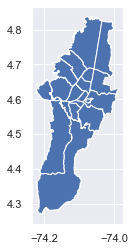

In [13]:
base1.geometry2.plot()

<AxesSubplot:>

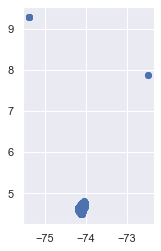

In [14]:
base1.geometry.plot()